<a href="https://colab.research.google.com/github/dakilaledesma/NCBG/blob/main/test/Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%time
! unzip -q drive/MyDrive/UNC/NCBG/sept13_testset.zip -d /content/temp

CPU times: user 621 ms, sys: 102 ms, total: 723 ms
Wall time: 1min 11s


In [ ]:
! mv /content/temp/content/images /content/test
! rm -rf /content/temp

In [ ]:
! git clone https://github.com/rwightman/pytorch-image-models.git

Cloning into 'pytorch-image-models'...
remote: Enumerating objects: 11103, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 11103 (delta 10), reused 14 (delta 5), pack-reused 11076
Receiving objects: 100% (11103/11103), 20.55 MiB | 15.98 MiB/s, done.
Resolving deltas: 100% (8156/8156), done.


In [ ]:
! python -u ./pytorch-image-models/inference.py test -b 32 --input-size 3 600 600 --num-classes 3 --no-test-pool --checkpoint /content/drive/MyDrive/UNC/NCBG/output/20220904-184244-convnext_large_384_in22ft1k-600/last.pth.tar --model convnext_large_384_in22ft1k

Loaded state_dict from checkpoint '/content/drive/MyDrive/UNC/NCBG/output/20220904-184244-convnext_large_384_in22ft1k-600/last.pth.tar'
Model convnext_large_384_in22ft1k created, param count: 196234947
Predict: [0/2959] Time 10.828 (10.828)
Predict: [10/2959] Time 1.407 (2.260)
Predict: [20/2959] Time 1.402 (1.855)
Predict: [30/2959] Time 1.414 (1.712)
Predict: [40/2959] Time 1.408 (1.640)
Predict: [50/2959] Time 1.417 (1.596)
Predict: [60/2959] Time 1.417 (1.566)
Predict: [70/2959] Time 1.425 (1.545)
Predict: [80/2959] Time 1.411 (1.529)
Predict: [90/2959] Time 1.413 (1.517)
Predict: [100/2959] Time 1.417 (1.507)
Predict: [110/2959] Time 1.413 (1.499)
Predict: [120/2959] Time 1.408 (1.492)
Predict: [130/2959] Time 1.418 (1.486)
Predict: [140/2959] Time 1.415 (1.481)
Predict: [150/2959] Time 1.412 (1.477)
Predict: [160/2959] Time 1.415 (1.473)
Predict: [170/2959] Time 1.417 (1.470)
Predict: [180/2959] Time 1.418 (1.467)
Predict: [190/2959] Time 1.419 (1.464)
Predict: [200/2959] Time 1.

In [ ]:
pred_file = open("topk_ids.csv")
pred_lines = pred_file.readlines()

pred_dict = {}
for l in pred_lines:
  l = l.strip().split(',')
  pred_dict[l[0]] = l[1]

In [ ]:
print(list(pred_dict.items())[:10])

[('1__gmp_1413831418011.jpg.jpg', '1'), ('2__gmp_1413831438890.jpg.jpg', '1'), ('4__gmp_1413833627833.jpg.jpg', '1'), ('5__gmp_1413834182808.jpg.jpg', '2'), ('6__gmp_1413834376873.jpg.jpg', '1'), ('7__sos_201_a.jpg.jpg', '1'), ('8__sos_201_b.jpg.jpg', '1'), ('9__sos_201_c.jpg.jpg', '2'), ('10__gmp_20140225_151354.jpg.jpg', '1'), ('11__gmp_20140225_151727.jpg.jpg', '1')]


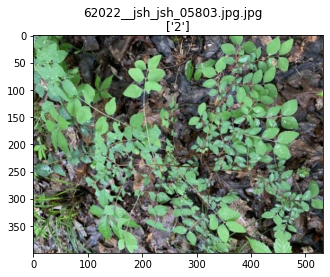

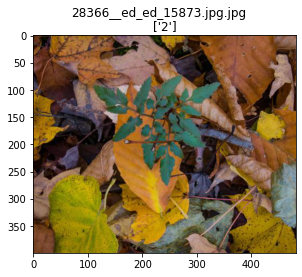

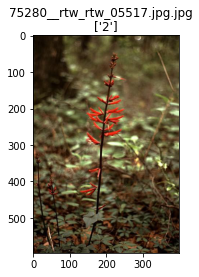

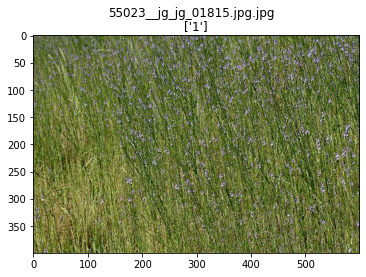

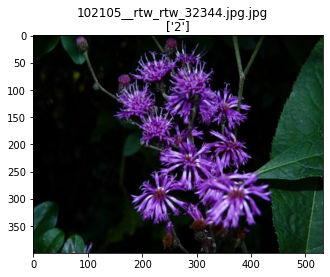

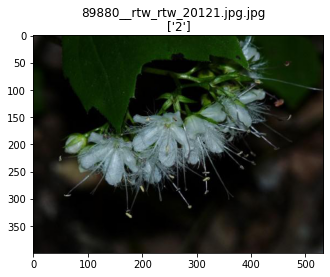

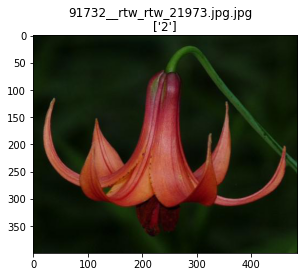

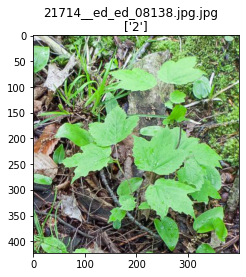

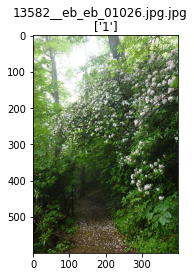

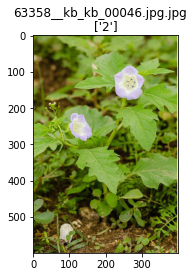

<Figure size 432x288 with 0 Axes>

In [ ]:
from glob import glob
import os
from PIL import Image, UnidentifiedImageError
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

for im_fn in list(glob("test/*.*"))[10:20]:
  # bn = os.path.basename(im_fn).split("__")[1].replace(".jpg", '')
  bn = os.path.basename(im_fn)
  im_o = Image.open(im_fn)
  im = im_o.resize((448, 448))
  im = np.array(im, dtype=int)
  im = np.reshape(im, (1, 448, 448, 3))

  pred_labels = [pred_dict[bn]]

  plt.imshow(im_o)
  plt.title(pred_labels)
  plt.suptitle(bn)
  plt.show()
  plt.clf()

In [ ]:
import shutil

for fl in ['high', 'medium', 'low']:
  fl_out = f"pred_quality/{fl}"
  if not os.path.isdir(fl_out):
    os.makedirs(fl_out)

for im_fn in tqdm(list(glob("test/*.*"))):
  bn = os.path.basename(im_fn)

  pred_labels = [pred_dict[bn]][0]
  if pred_labels == '0':
    out_fl = f"pred_quality/low"
  elif pred_labels == '1':
    out_fl = f"pred_quality/medium"
  elif pred_labels == '2':
    out_fl = f"pred_quality/high"
  else:
    continue

  shutil.copy(im_fn, f"{out_fl}/{bn}")

  0%|          | 0/94670 [00:00<?, ?it/s]

In [ ]:
! zip -0 -r -q drive/MyDrive/UNC/NCBG/quality_preds.zip pred_quality/